In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


Part 1: Prepare the Data

In [2]:
myopia = pd.read_csv("myopia.csv")
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset.
labels = myopia['MYOPIC']
myopia = myopia.drop(columns = ['MYOPIC'])
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize your dataset
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia)

Part 2: Apply Dimensionality Reduction

In [5]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
# For this assignment, preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components = 0.9)
myopia_pca = pca.fit_transform(myopia_scaled)

In [6]:
sum(pca.explained_variance_ratio_)

0.9187361702915187

After performing dimensionality reduction with PCA, the dataset went from 14 columns to 10, preserving 91.9% of the original data.

In [7]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE()
tsne_features = tsne.fit_transform(myopia_pca)

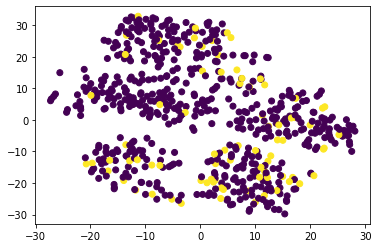

In [8]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

Part 3: Perform a Cluster Analysis with K-means

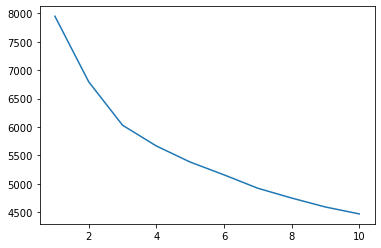

In [9]:
# Create an elbow plot to identify the best number of clusters. 
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters = i)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

plt.plot( k, inertia)
plt.show()

The most distinct "elbow" appears to be at k=3

In [10]:
km = KMeans(n_clusters = 3)
km.fit(myopia_pca)
predicted_clusters = km.predict(myopia_pca)

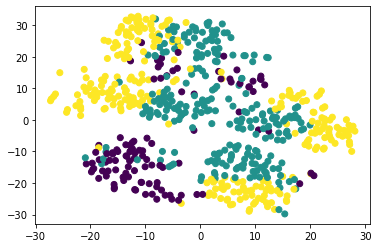

In [11]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=predicted_clusters)
plt.show()

Part 4: Make a Recommendation